In [1]:
  # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# Importing the train and test data

In this piece of code we will be importing the dataset uploaded in this notebook as the input.

In [2]:
test_data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
train_data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")

# Exploring Data

We will be exploring the data available with us. We will be exploring the types of columns available with us. As we already have data card available in the competetion , so we won't be wasting much time on understanding each column . But we will be surely having an eye on the statistics of the numerical columns available in the data set.

In [3]:
train_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [4]:
columns = train_data.columns
columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [5]:
x = train_data[['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore', 'Recipe_Review']]

In [6]:
x.head()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,20,0,0,0,5,100,great recipe! I have made them just as written...
1,1,0,0,1,5,100,This is an easy and quick recipe that is great...
2,1,0,0,0,3,100,I think I was looking for something extra spec...
3,1,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,1,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [7]:
x.describe()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,2.160311,0.014520,1.098269,0.543708,4.288721,153.127897
std,10.086424,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
50%,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
75%,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
max,510.000000,3.000000,80.000000,126.000000,5.000000,946.000000


### Conclusions from analyzing statistics

From the above statistics obtained from the numerical column of train data we can conculude that
- All the values in all columns are positive
- All the quartiles are mode of the columns in most of the case.
- The Thumbs and Reply count have most of the values as 0

# Vizualizing the data

- We will try to compare the plots of the most common relations . We will analyze columns vs Target variable plots to analyze the trends. 

- We will also analyze box plots to analyze the impact of outliers.

- We will also see the scaling effect on the data , using the pre and post KDE graph after scaling the data.

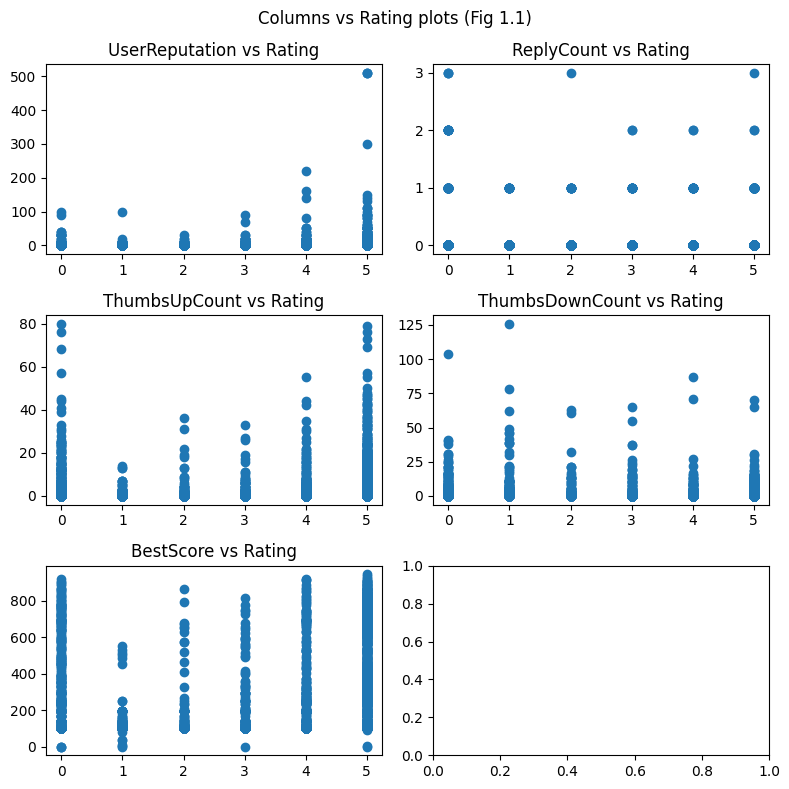

In [8]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

plt.suptitle('Columns vs Rating plots (Fig 1.1)')

# Iterate over the numerical columns
for i, col in enumerate(['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount' , 'BestScore']):
    # Plot the data
    axs[i // 2, i % 2].scatter(x['Rating'], x[col])
    # Set the title
    axs[i // 2, i % 2].set_title(f'{col} vs Rating')

plt.tight_layout()

# Display the plot
plt.show()


In [9]:
Reputation_count = x.UserReputation.value_counts()
Reputation_count

UserReputation
1      12708
10       478
20       217
0        118
30        54
50        16
40        12
90         7
80         4
60         4
100        3
510        3
110        3
70         2
140        2
160        1
220        1
130        1
150        1
300        1
Name: count, dtype: int64

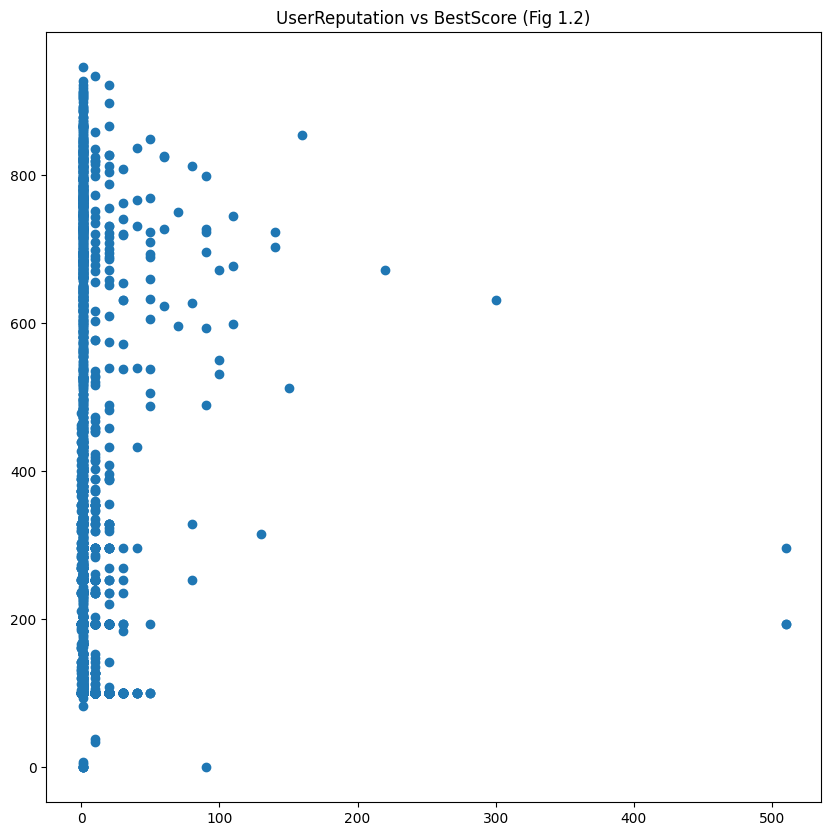

In [10]:
import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
ax.scatter(x['UserReputation'], x['BestScore'])

# Set the title
ax.set_title('UserReputation vs BestScore (Fig 1.2)')

# Display the plot
plt.show()


### Inference from Fig 1.2

From Fig 1.2 we can ensure that there not much users in very high reputation category . And even if there are some users in that category , their reviews don't have the Best Score , so this means that Best Score don't realy depend on the user reputaion.

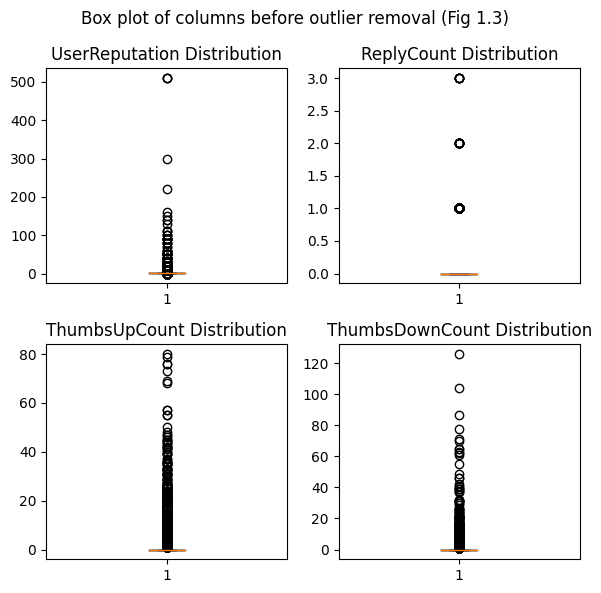

In [11]:
import matplotlib.pyplot as plt
# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

plt.suptitle('Box plot of columns before outlier removal (Fig 1.3)')

# Iterate over the numerical columns except 'Rating'
for i, col in enumerate(['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount']):
    # Plot the box plot
    axs[i // 2, i % 2].boxplot(x[col])
    # Set the title
    axs[i // 2, i % 2].set_title(f'{col} Distribution')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

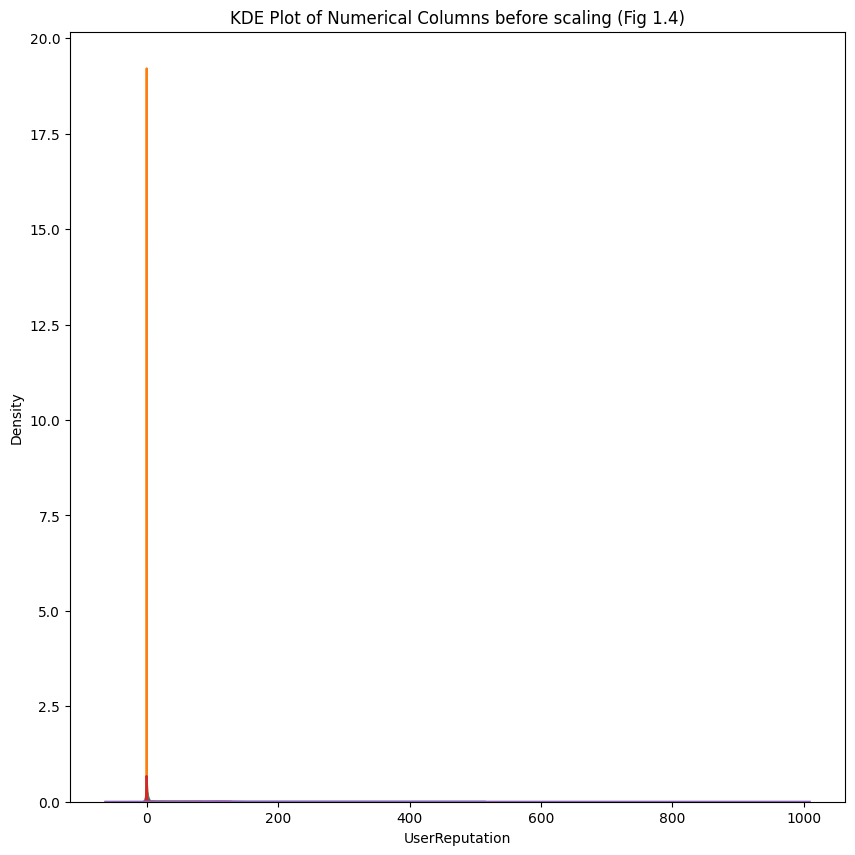

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Iterate over the numerical columns
for col in ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']:
    # Plot the KDE plot
    sns.kdeplot(x[col], ax=ax)

# Set the title
ax.set_title('KDE Plot of Numerical Columns before scaling (Fig 1.4)')

# Display the plot
plt.show()


In [13]:
def remove_outliers_iqr(df, columns):
  """
  Removes outliers from the given dataframe using the IQR method.

  Args:
    df: The dataframe to remove outliers from.
    columns: A list of column names to remove outliers from.

  Returns:
    The dataframe with outliers removed.
  """

  for col in columns:

    if df[col].nunique() >= 10:
      # Calculate the IQR
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1

      # Calculate the lower and upper bounds
      lower_bound = Q1 - (1.5 * IQR)
      upper_bound = Q3 + (1.5 * IQR)

      # Remove outliers
      df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Remove outliers from the 'x' dataframe, excluding the 'Rating' column
x = remove_outliers_iqr(x, x.columns.drop(['Rating' , 'Recipe_Review']))


In [14]:
x.head()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
1,1,0,0,1,5,100,This is an easy and quick recipe that is great...
2,1,0,0,0,3,100,I think I was looking for something extra spec...
3,1,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,1,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
5,1,0,1,0,5,193,"Absolutely delicious! Easy, tasty and filling!"


In [15]:
x.shape

(12708, 7)

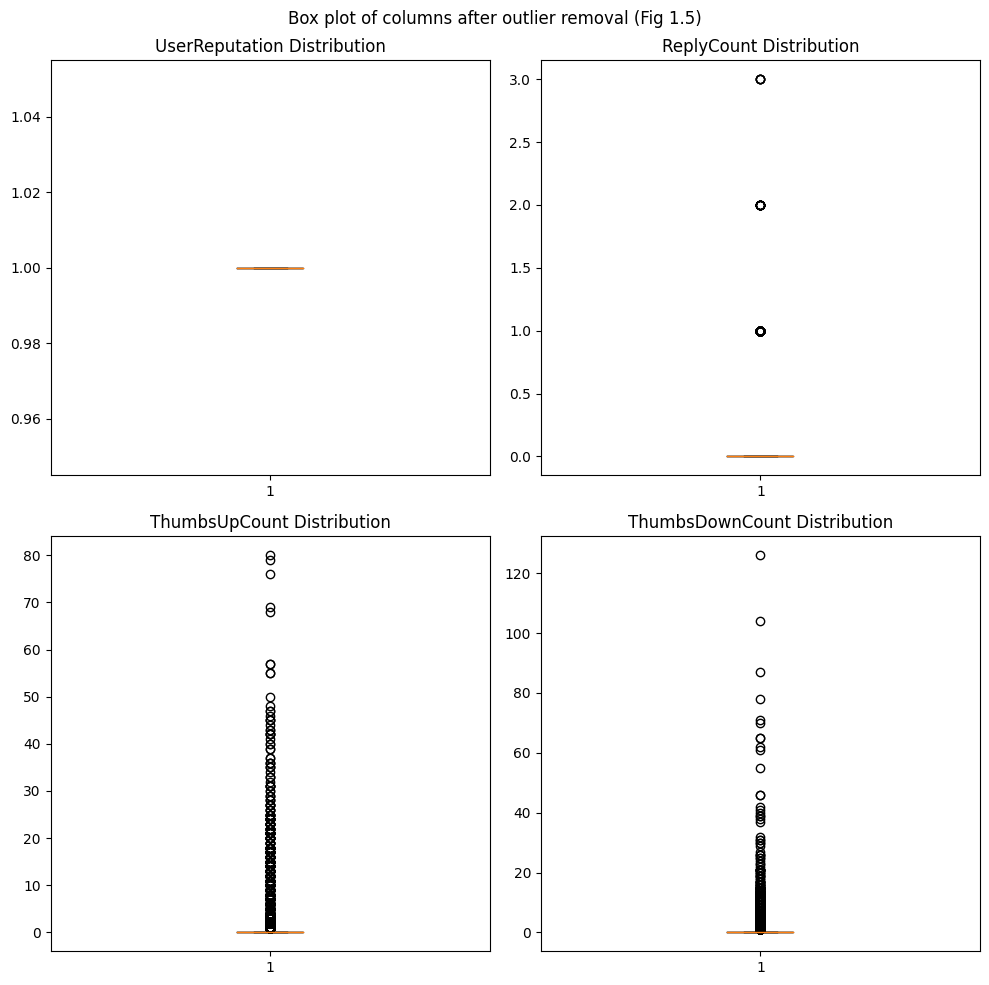

In [16]:
import matplotlib.pyplot as plt
# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plt.suptitle('Box plot of columns after outlier removal (Fig 1.5)')

# Iterate over the numerical columns except 'Rating'
for i, col in enumerate(['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount']):
    # Plot the box plot
    axs[i // 2, i % 2].boxplot(x[col])
    # Set the title
    axs[i // 2, i % 2].set_title(f'{col} Distribution')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [17]:

from sklearn.preprocessing import StandardScaler

# Define the columns to scale
numeric_features = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

# Create the scaler
scaler = StandardScaler()

# Fit and transform the data
x[numeric_features] = scaler.fit_transform(x[numeric_features])


In [18]:
x.head()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
1,0.0,-0.099564,-0.251453,0.156674,5,-0.358093,This is an easy and quick recipe that is great...
2,0.0,-0.099564,-0.251453,-0.158409,3,-0.358093,I think I was looking for something extra spec...
3,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,This is our favorite grilled chicken recipe. ...
4,0.0,-0.099564,-0.251453,-0.158409,4,-0.358093,Great basic recipe. I added 2 teaspoons Tuscan...
5,0.0,-0.099564,0.002862,-0.158409,5,0.331920,"Absolutely delicious! Easy, tasty and filling!"


In [19]:
x.shape

(12708, 7)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_26/1441705122.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x[col], ax=ax)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-

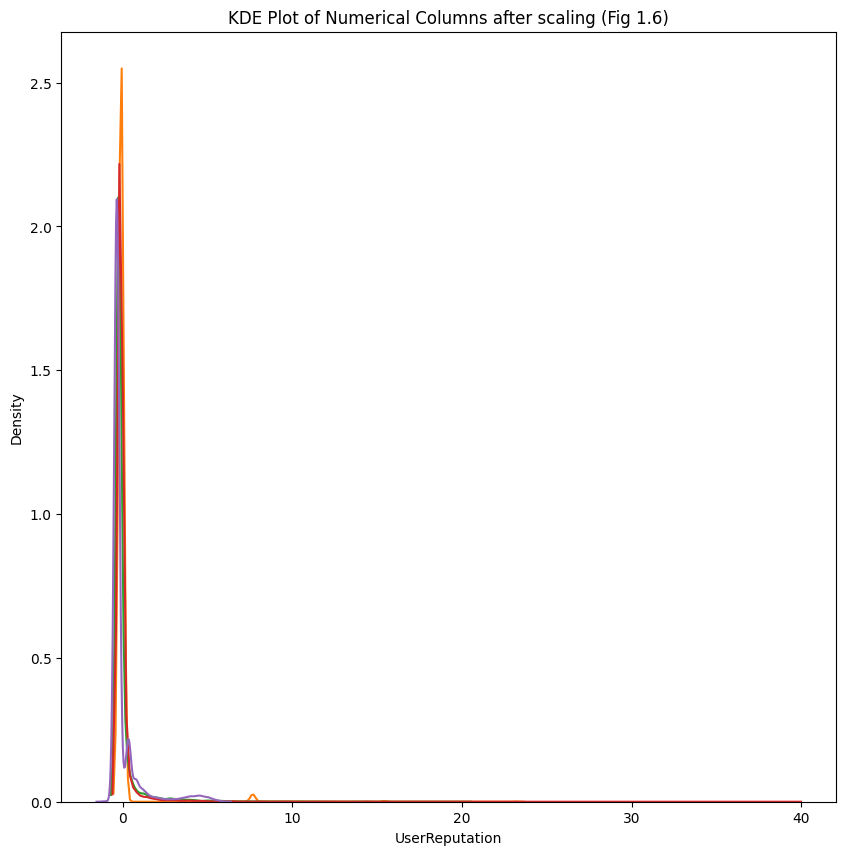

In [20]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Iterate over the numerical columns
for col in ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']:
    # Plot the KDE plot
    sns.kdeplot(x[col], ax=ax)

# Set the title
ax.set_title('KDE Plot of Numerical Columns after scaling (Fig 1.6)')

# Display the plot
plt.show()

### Inference from KDE and box plot

- While ReplyCount , ThumbsUpCount , ThumbsDownCount were not very much affected by the outliers , but the UserReputation box-plot clearly showed the impact of outliers. Removal of outliers ensurest that , if we use any outlier sensitive method , then that mustn't behave unexpectedly while model training.

- In the KDE distribution before scaling we can clearly see that a single feature covers most of the density of the numerical data. But after scaling all the features , we have some negative data (which was not present earlier) but the density is now evenly distributed among all the features.

# Preparing Reviews of the users

As we noticed that the Recipe_Review column is very special case in our data. We can not directly neglet this column from the data , as it is clear that the reviews are very much influencial to drive the rating of the recipes. For handeling this type of data , where everything consits of string and basically represents human responses , we need to use the basics of natural language processing . 

Basic idea is :-

- Apply stop words
- Use tfidf vectorization on the column to convert the texts into numerical features

These methods will actually help us to convert these responses to , machine understandable format.

In [21]:
non_string_indices = []

# Iterate over each row in the 'Recipe_Review' column
for i, row in x['Recipe_Review'].items():
    # Check if the data type is not string
    if not isinstance(row, str):
        non_string_indices.append(i)

# Print the indices of non-string values
print(non_string_indices)


[2984, 11654]


In [22]:
x = x.drop(non_string_indices)

In [23]:

# Find the indices of rows with NaN values in any column
nan_indices = x.index[x.isna().any(axis=1)]

# Print the indices
print(nan_indices)


Index([], dtype='int64')


In [24]:
fitting_data = pd.concat([x['Recipe_Review'],test_data['Recipe_Review']])

In [25]:
fitting_data

1       This is an easy and quick recipe that is great...
2       I think I was looking for something extra spec...
3       This is our favorite grilled chicken recipe.  ...
4       Great basic recipe. I added 2 teaspoons Tuscan...
5        Absolutely delicious!   Easy, tasty and filling!
                              ...                        
4541    This is an absolutely wonderful seafood recipe...
4542    This us a definite &#34;OMG&#34;.  Tastes sinf...
4543    absolutely great....even husband and grandson ...
4544    I followed directions. It tastes very bland. V...
4545    After reading the amazing reviews, I decided t...
Name: Recipe_Review, Length: 17252, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object with stop words
vectorizer = TfidfVectorizer(max_features=6151,stop_words='english')

vectorizer.fit(fitting_data)




TfidfVectorizer(max_features=6151, stop_words='english')

In [27]:
# Fit and transform the 'Recipe_Review' column
x_transformed_review = vectorizer.transform(x['Recipe_Review'])

# Print the shape of the transformed data
print(x_transformed_review.shape)

(12706, 6151)


In [28]:
x_transformed_review_df = pd.DataFrame(x_transformed_review.toarray(), columns=vectorizer.get_feature_names_out())

x_transformed_review_df

,00,02,03,05,08,10,100,10x,10x13,11,...,ziplock,zipper,zippy,zoodles,zucc,zucchini,zucchinis,zuchini,zuchinni,zucs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
x.shape

(12706, 7)

In [30]:
x = pd.concat([x.reset_index(drop=True), x_transformed_review_df.reset_index(drop=True)], axis=1)

In [31]:
x.shape

(12706, 6158)

In [32]:
x

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,00,02,03,...,ziplock,zipper,zippy,zoodles,zucc,zucchini,zucchinis,zuchini,zuchinni,zucs
0,0.0,-0.099564,-0.251453,0.156674,5,-0.358093,This is an easy and quick recipe that is great...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.099564,-0.251453,-0.158409,3,-0.358093,I think I was looking for something extra spec...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,This is our favorite grilled chicken recipe. ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-0.099564,-0.251453,-0.158409,4,-0.358093,Great basic recipe. I added 2 teaspoons Tuscan...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.099564,0.002862,-0.158409,5,0.331920,"Absolutely delicious! Easy, tasty and filling!",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,Delicious!! Very easy to make! One minor chang...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12702,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,I made this pie for my family and they loved i...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12703,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,Very tasty!,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12704,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,I have made this numerous times. It&#39;s so ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Performing Train test split

As we know that provided test.csv don't have any Rating column , hence we will split the train file only into two parts for prediction and calculating accuracy score.

In [33]:

x.columns = x.columns.astype(str)


In [34]:


y = x['Rating']
x = x.drop(['Rating', 'Recipe_Review'], axis=1)


In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Create a LinearSVC classifier
clf1 = LinearSVC(max_iter=2500)

# Fit the classifier to the training data
clf1.fit(X_train, y_train)

# Predict on the test data
y_pred1 = clf1.predict(X_test)

# Calculate the accuracy score
accuracy1 = accuracy_score(y_test, y_pred1)

# Print the accuracy score
print(accuracy1)


0.7714398111723053


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf2 = RandomForestClassifier(n_estimators=500)

# Fit the classifier to the training data
clf2.fit(X_train, y_train)

# Predict on the test data
y_pred2 = clf2.predict(X_test)

# Calculate the accuracy score
accuracy2 = accuracy_score(y_test, y_pred2)

# Print the accuracy score
print(accuracy2)


0.7698662470495673


# Checkpoint 1

The accuracy in the random forest classifier is more than cutoff

In [38]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
clf3 = LogisticRegression(max_iter=1500)

# Fit the classifier to the training data
clf3.fit(X_train, y_train)

# Predict on the test data
y_pred3 = clf3.predict(X_test)

# Calculate the accuracy score
accuracy3 = accuracy_score(y_test, y_pred3)

# Print the accuracy score
print(accuracy3)


0.7730133752950433


# Checkpoint 2

The accuracy in the random forest classifier is more than cutoff

In [39]:
from xgboost import XGBClassifier

# Create a XGBoost classifier
clf4 = XGBClassifier(n_estimators=500)

# Fit the classifier to the training data
clf4.fit(X_train, y_train)

# Predict on the test data
y_pred4 = clf4.predict(X_test)

# Calculate the accuracy score
accuracy4 = accuracy_score(y_test, y_pred4)

# Print the accuracy score
print(accuracy4)


0.7734067663257278


In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [41]:
# Define the base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=500)),
    ('svc', LinearSVC(max_iter=2500)),
    ('xgb', XGBClassifier(n_estimators=1000))
]

# Define the final model
final_estimator = LogisticRegression(max_iter=1500)

# Create the stacking classifier
clf5 = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Fit the classifier to the training data
clf5.fit(X_train, y_train)

# Predict on the test data
y_pred5 = clf5.predict(X_test)

# Calculate the accuracy score
accuracy5 = accuracy_score(y_test, y_pred5)

# Print the accuracy score
print(accuracy5)


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

0.7808811959087333


In [42]:
# Define the base models
estimators = [
    ('lr', LogisticRegression(max_iter=1500)),
    ('svc', LinearSVC(max_iter=2500)),
    ('xgb', XGBClassifier(n_estimators=1000))
]

# Define the final model
final_estimator = RandomForestClassifier(n_estimators=500)

# Create the stacking classifier
clf6 = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Fit the classifier to the training data
clf6.fit(X_train, y_train)

# Predict on the test data
y_pred6 = clf6.predict(X_test)

# Calculate the accuracy score
accuracy6 = accuracy_score(y_test, y_pred6)

# Print the accuracy score
print(accuracy6)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

0.7781274586939417


# Preparing test.csv for final prediction

As we performed pre processing on the train data-set , we need to perform the same , pre processing on the test dataset as well and fit the data on the best model for prediction.

In [43]:
test_final = test_data[['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount' , 'BestScore', 'Recipe_Review']]

In [44]:
# Define the columns to scale
numeric_features = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']


# Fit and transform the data
test_final[numeric_features] = scaler.fit_transform(test_final[numeric_features])


/tmp/ipykernel_26/1549346602.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_final[numeric_features] = scaler.fit_transform(test_final[numeric_features])


In [45]:
# Fit and transform the 'Recipe_Review' column
final_review = vectorizer.transform(test_final['Recipe_Review'])

# Print the shape of the transformed data
print(final_review.shape)

(4546, 6151)


In [46]:
final_review_df = pd.DataFrame(final_review.toarray(), columns=vectorizer.get_feature_names_out())

final_review_df

,00,02,03,05,08,10,100,10x,10x13,11,...,ziplock,zipper,zippy,zoodles,zucc,zucchini,zucchinis,zuchini,zuchinni,zucs
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.144895,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4542,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4543,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
test_final.shape

(4546, 6)

In [48]:
test_final = pd.concat([test_final.reset_index(drop=True), final_review_df.reset_index(drop=True)], axis=1)

In [49]:
test_final.shape

(4546, 6157)

In [50]:
test_final.columns = test_final.columns.astype(str)

In [51]:
test_final = test_final.drop(['Recipe_Review'], axis=1)

In [52]:
# Predict on the test data
final_pred = clf5.predict(test_final)

# Saving the final submission file

while keeping in mind that we had 2 columns , 'ID' and 'Rating' in the sample.csv file , we need to create a similar submission file. One more thing to keep in mind is , 'ID' column starts from 1 and not 0.

In [53]:
submission=pd.DataFrame(columns=['ID', 'Rating'])
submission['ID']=[i+1 for i in range(len(final_pred))]
submission["Rating"]=[i for i in final_pred]
submission.to_csv('/kaggle/working/submission.csv',index=False)

In [54]:
submission

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,1
4,5,5
...,...,...
4541,4542,5
4542,4543,5
4543,4544,5
4544,4545,1
